In [1]:
import sys
import os
sys.path.append('/home/franzi/anzeigendaten/python_base/skillextraktion/fh_ma')
sys.path.append('/home/franzi/anzeigendaten/EnvPython')
import prepare_training_data
from labels import *
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

start = time.time()
x_train, y_train, x_test, y_test, test_afks, features = prepare_training_data.get_training_data(berufsgruppen=True, pos=True, word_features=True)
print('took: ',time.time()-start)

20861874
0
skipgram, punctuation_marks, stoppwords, multiword, lower_case, vector_dim True False False False False 100
init /home/franzi/Documents/models/no_pm_no_sw_vecDim100/skip_gram_model.model
loading existing w2v model from  /home/franzi/Documents/models/no_pm_no_sw_vecDim100/skip_gram_model.model
using data from  /home/franzi/Documents/data/data_bg_pos_wFeatures_4_vecDim100
loading data...
37823 37823 12053 12053 0 0
took:  4.088180303573608


In [3]:
import numpy as np
for i,f in enumerate(features):
    features[i] = np.array(f)
pos_test, wf_test, bg_test, pos_train, wf_train, bg_train,  _, _, _ = features

print(wf_train[0]) # Abgeschlossene
print(pos_train[0]) # ADJA first
print(y_train[0])

[[0.         0.         0.         0.         1.         0.
  0.         0.         1.         0.         1.         0.00033559]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
from tensorflow.keras import *

In [6]:
wf_test = np.reshape(wf_test, (wf_test.shape[0], wf_test.shape[2]))
wf_train = np.reshape(wf_train, (wf_train.shape[0], wf_train.shape[2]))
pos_test = np.reshape(pos_test, (pos_test.shape[0], pos_test.shape[2]))
pos_train = np.reshape(pos_train, (pos_train.shape[0], pos_train.shape[2]))

In [8]:
# Build the model
print('Build model...')
lstm2_model = Sequential()
lstm2_model.add(layers.LSTM(256, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
lstm2_model.add(layers.BatchNormalization())
lstm2_model.add(layers.Dropout(0.5))
lstm2_model.add(layers.LSTM(512, return_sequences=True))
lstm2_model.add(layers.Dropout(0.5))
lstm2_model.add(layers.BatchNormalization())
lstm2_model.add(layers.LSTM(256))
lstm2_model.add(layers.Dropout(0.5))
lstm2_model.add(layers.Dense(256))
lstm2_model.add(layers.Dense(units=len(labels)))
lstm2_model.add(layers.Activation('softmax'))
lstm2_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

batch_size=32
history = lstm2_model.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=5, validation_data=(x_test, y_test))

Build model...
Train on 37823 samples, validate on 12053 samples


2020-08-20 17:42:08 WARNING: From /home/franzi/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
37823/37823 [==============================] - 150s 4ms/sample - loss: 0.8407 - acc: 0.6873 - val_loss: 0.5747 - val_acc: 0.8004
Epoch 2/5
37823/37823 [==============================] - 147s 4ms/sample - loss: 0.5274 - acc: 0.8141 - val_loss: 0.4761 - val_acc: 0.8322
Epoch 3/5
37823/37823 [==============================] - 147s 4ms/sample - loss: 0.4630 - acc: 0.8382 - val_loss: 0.4527 - val_acc: 0.8403
Epoch 4/5
37823/37823 [==============================] - 146s 4ms/sample - loss: 0.4240 - acc: 0.8534 - val_loss: 0.4278 - val_acc: 0.8537
Epoch 5/5
37823/37823 [==============================] - 145s 4ms/sample - loss: 0.3995 - acc: 0.8605 - val_loss: 0.4300 - val_acc: 0.8531


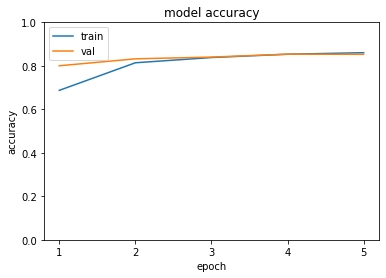

In [9]:
from matplotlib import pyplot as plt
plt.plot(np.arange(1, len(history.history['acc'])+1), history.history['acc'])
plt.plot(np.arange(1, len(history.history['acc'])+1), history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.xticks(np.arange(1, len(history.history['acc'])+1))
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [10]:
# predict test data
lstm2_pred = lstm2_model.predict([x_test])
lstm2_pred_label = prepare_training_data.one_hot_to_labels(lstm2_pred)

In [ ]:
import numpy as np
true_label = prepare_training_data.one_hot_to_labels(y_test)

In [13]:
# Build the model
print('Build model...')
lstm_model = Sequential()
lstm_model.add(layers.LSTM(256, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
lstm_model.add(layers.BatchNormalization())
lstm_model.add(layers.Dropout(0.5))
lstm_model.add(layers.LSTM(512, return_sequences=True))
lstm_model.add(layers.Dropout(0.5))
lstm_model.add(layers.BatchNormalization())
lstm_model.add(layers.LSTM(256))
lstm_model.add(layers.Dropout(0.5))
lstm_model.add(layers.Dense(256))
lstm_model.add(layers.Dense(units=len(labels)))
lstm_model.add(layers.Activation('softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

batch_size=32
history = lstm_model.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=5, validation_data=(x_test, y_test))

Build model...
Train on 37823 samples, validate on 12053 samples
Epoch 1/5
37823/37823 [==============================] - 150s 4ms/sample - loss: 0.8359 - acc: 0.6929 - val_loss: 0.6337 - val_acc: 0.7753
Epoch 2/5
37823/37823 [==============================] - 145s 4ms/sample - loss: 0.5299 - acc: 0.8129 - val_loss: 0.4897 - val_acc: 0.8220
Epoch 3/5
37823/37823 [==============================] - 146s 4ms/sample - loss: 0.4625 - acc: 0.8384 - val_loss: 0.4651 - val_acc: 0.8395
Epoch 4/5
37823/37823 [==============================] - 145s 4ms/sample - loss: 0.4253 - acc: 0.8521 - val_loss: 0.4331 - val_acc: 0.8438
Epoch 5/5
37823/37823 [==============================] - 146s 4ms/sample - loss: 0.3996 - acc: 0.8630 - val_loss: 0.4195 - val_acc: 0.8558


In [14]:
# predict test data
lstm_y_pred = lstm_model.predict([x_test])
lstm_pred_label = prepare_training_data.one_hot_to_labels(lstm_y_pred)

In [15]:
# Build the model
print('Build model...')
lstm3_model = Sequential()
lstm3_model.add(layers.LSTM(256, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
lstm3_model.add(layers.BatchNormalization())
lstm3_model.add(layers.Dropout(0.5))
lstm3_model.add(layers.LSTM(512, return_sequences=True))
lstm3_model.add(layers.Dropout(0.5))
lstm3_model.add(layers.BatchNormalization())
lstm3_model.add(layers.LSTM(256))
lstm3_model.add(layers.Dropout(0.5))
lstm3_model.add(layers.Dense(256))
lstm3_model.add(layers.Dense(units=len(labels)))
lstm3_model.add(layers.Activation('softmax'))
lstm3_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

batch_size=32
history = lstm3_model.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=5, validation_data=(x_test, y_test))

Build model...
Train on 37823 samples, validate on 12053 samples
Epoch 1/5
37823/37823 [==============================] - 148s 4ms/sample - loss: 0.8278 - acc: 0.6942 - val_loss: 0.6004 - val_acc: 0.7902
Epoch 2/5
37823/37823 [==============================] - 145s 4ms/sample - loss: 0.5357 - acc: 0.8091 - val_loss: 0.4825 - val_acc: 0.8293
Epoch 3/5
37823/37823 [==============================] - 146s 4ms/sample - loss: 0.4705 - acc: 0.8343 - val_loss: 0.4674 - val_acc: 0.8417
Epoch 4/5
37823/37823 [==============================] - 145s 4ms/sample - loss: 0.4238 - acc: 0.8524 - val_loss: 0.4375 - val_acc: 0.8464
Epoch 5/5
37823/37823 [==============================] - 147s 4ms/sample - loss: 0.3994 - acc: 0.8603 - val_loss: 0.4835 - val_acc: 0.8492


In [16]:
# predict test data
lstm3_pred = lstm3_model.predict([x_test])
lstm3_pred_label = prepare_training_data.one_hot_to_labels(lstm3_pred)

In [17]:
pred_label = []
for i in range(len(x_test)):
    curr_labels = [lstm_pred_label[i], lstm2_pred_label[i], lstm3_pred_label[i]]
    if(curr_labels.count(lstm_pred_label[i] >= 2)): pred_label.append(lstm_pred_label[i])
    elif(curr_labels.count(lstm2_pred_label[i] >= 2)): pred_label.append(lstm2_pred_label[i])
    elif(curr_labels.count(lstm3_pred_label[i] >= 2)): pred_label.append(lstm3_pred_label[i])
    else: pred_label.append(lstm_pred_label[i])

In [18]:
# Calc metrics for test data
import sklearn
from sklearn.metrics import precision_score, recall_score, accuracy_score
from tabulate import tabulate
label_list = list(labels.keys())

headers = [l for l in label_list ]
headers = [' '] + headers

table=[['precision'] + list(precision_score(true_label, pred_label, average=None)), 
       ['recall']+list(recall_score(true_label, pred_label, average=None)), 
       ['f1']+ list(sklearn.metrics.f1_score(true_label, pred_label, average=None))]

print(tabulate(table, headers=headers, tablefmt='orgtbl'))
f1 = sklearn.metrics.f1_score(true_label, pred_label, average=None)
f1 = np.delete(f1, 4)
f1 = np.delete(f1, 6)
print('f1 average: ',sum(sklearn.metrics.f1_score(true_label, pred_label, average=None))/len(list(precision_score(true_label, pred_label, average=None))))
print('f1 average: ',sum(f1)/6)
print('Precision average: ',sum(precision_score(true_label, pred_label, average=None)/8))
print('recall average: ',sum(recall_score(true_label, pred_label, average=None)/8))
print('acc', sklearn.metrics.accuracy_score(true_label, pred_label))

|           |   Ausbildung |    Beruf |   allgemein |   berufsspez |   Sprache |   Technologie |   Softskill |   noSkill |
|-----------+--------------+----------+-------------+--------------+-----------+---------------+-------------+-----------|
| precision |     0.782407 | 0.857143 |    0.619444 |     0.63198  |  0.967442 |      0.79081  |    0.761569 |  0.928173 |
| recall    |     0.918478 | 0.1875   |    0.312763 |     0.698131 |  0.941176 |      0.843871 |    0.901578 |  0.922174 |
| f1        |     0.845    | 0.307692 |    0.415657 |     0.66341  |  0.954128 |      0.816479 |    0.82568  |  0.925164 |
f1 average:  0.7191514406889521
f1 average:  0.6456532198084542
Precision average:  0.7923710221905266
recall average:  0.7157089785058312
acc 0.8556376005973616


In [19]:
lstm_prob = lstm_model.predict_proba([x_test])
lstm2_prob = lstm2_model.predict_proba([x_test])
lstm3_prob = lstm3_model.predict_proba([x_test])

In [20]:
pred_label2 = []
probabilities = []
for i in range(len(x_test)):
    probs = [0] * len(labels)
    items = [lstm_prob[i], lstm2_prob[i], lstm3_prob[i]]
    stats = {}
    for net in range(len(items)):
        for index in range(len(items[net])):
            probs[index] += items[net][index]
    pred_label2.append(probs.index(max(probs)))

In [21]:
# Calc metrics for test data
import sklearn
from sklearn.metrics import precision_score, recall_score, accuracy_score
from tabulate import tabulate
label_list = list(labels.keys())

headers = [l for l in label_list ]
headers = [' '] + headers

table=[['precision'] + list(precision_score(true_label, pred_label2, average=None)), 
       ['recall']+list(recall_score(true_label, pred_label2, average=None)), 
       ['f1']+ list(sklearn.metrics.f1_score(true_label, pred_label2, average=None))]

print(tabulate(table, headers=headers, tablefmt='orgtbl'))
f1 = sklearn.metrics.f1_score(true_label, pred_label2, average=None)
f1 = np.delete(f1, 4)
f1 = np.delete(f1, 6)
print('f1 average: ',sum(sklearn.metrics.f1_score(true_label, pred_label2, average=None))/len(list(precision_score(true_label, pred_label2, average=None))))
print('f1 average: ',sum(f1)/6)
print('Precision average: ',sum(precision_score(true_label, pred_label2, average=None)/8))
print('recall average: ',sum(recall_score(true_label, pred_label2, average=None)/8))
print('acc', sklearn.metrics.accuracy_score(true_label, pred_label2))

|           |   Ausbildung |    Beruf |   allgemein |   berufsspez |   Sprache |   Technologie |   Softskill |   noSkill |
|-----------+--------------+----------+-------------+--------------+-----------+---------------+-------------+-----------|
| precision |     0.844406 | 0.606061 |    0.683398 |     0.656415 |  0.981043 |      0.802956 |    0.75746  |  0.919052 |
| recall    |     0.875    | 0.3125   |    0.248247 |     0.698131 |  0.936652 |      0.84129  |    0.91922  |  0.936024 |
| f1        |     0.859431 | 0.412371 |    0.364198 |     0.67663  |  0.958333 |      0.821676 |    0.830537 |  0.92746  |
f1 average:  0.7313295664852208
f1 average:  0.6608071226439695
Precision average:  0.7813485917014851
recall average:  0.7208829898308695
acc 0.860532647473658


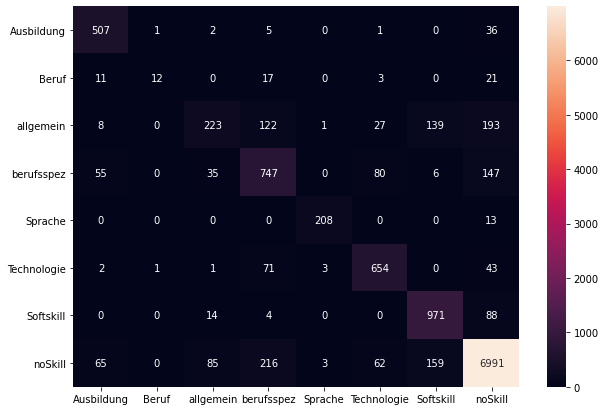

In [22]:
# Create Confusion Matrix

import sklearn
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = sklearn.metrics.confusion_matrix(true_label, pred_label)
df_cm = pd.DataFrame(cm, labels,columns = labels)
plt.figure(figsize = (10,7))
plt.ylabel('Eingabe')
plt.xlabel('Ausgabe')
sn.heatmap(df_cm, annot=True,fmt='g')

In [23]:
# clean noSkill for evaluation
clean_y_pred = []
clean_y_test = []
true_noSkills = 0
clean_x_test = []
afks = []

for i in range(len(y_test)):
    if(true_label[i] != 7 or pred_label[i] != 7):
        clean_x_test.append(x_test[i])
        clean_y_pred.append(pred_label[i])
        clean_y_test.append(true_label[i])
        afks.append(test_afks[i])
    else:
        true_noSkills += 1
pred_label = clean_y_pred
true_label = clean_y_test
print('correctly labeled noSkills: ', true_noSkills)

correctly labeled noSkills:  6991


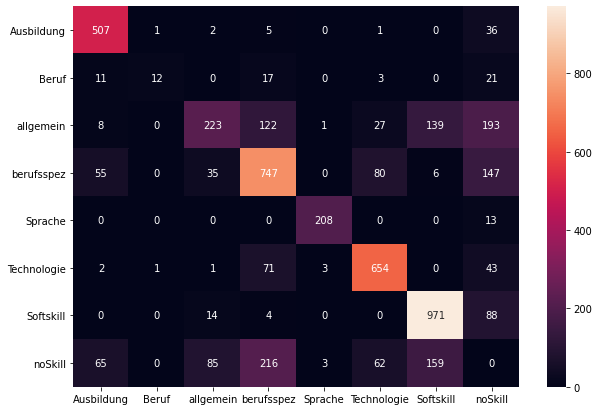

In [24]:
# Create Confusion Matrix

import sklearn
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = sklearn.metrics.confusion_matrix(true_label, pred_label)
df_cm = pd.DataFrame(cm, labels,columns = labels)
plt.figure(figsize = (10,7))
plt.ylabel('Eingabe')
plt.xlabel('Ausgabe')
sn.heatmap(df_cm, annot=True,fmt='g')

In [25]:
from word2vec import W2V
correct = []
false = []

clean_x_test, pred_label, true_label, afks = shuffle(clean_x_test, pred_label, true_label, afks,random_state=0)
skill_index = int(len(clean_x_test[0])/2)
label_list = list(labels.keys())


headers = [['|']+[l] for l in label_list ]
headers = sum(headers, [])
headers.append('|')

wvs = []
for i in range(len(clean_x_test)):
    wvs.append(clean_x_test[i][skill_index])

w2v = W2V(skipgram=True, punctuation_marks=False, stoppwords=False, multiword=False, lower_case=False, vector_dim=100)

predictions = [[],[],[],[],[],[],[], []]
for i in range(len(clean_x_test)):
    word = w2v.get_closest_word_to_vec(wvs[i])[0][0]
    label = str(true_label[i])
    predictions[pred_label[i]].append(word + '('+label+')')

table = []
# format
i = 0
while(i < len(predictions[0]) or i < len(predictions[1]) or i < len(predictions[2]) or i < len(predictions[3]) or i < len(predictions[4]) or i < len(predictions[5] or i < len(predictions[6]))):
    row = ['|']
    for x in predictions:
        if(len(x) > i and len(x[i]) <  25): 
            row.append(x[i])
            row.append('|')
        else:
            row.append('')
            row.append('|')
            
    table.append(row)
    i+=1    

print(tabulate(table, headers=headers))

skipgram, punctuation_marks, stoppwords, multiword, lower_case, vector_dim True False False False False 100
init /home/franzi/Documents/models/no_pm_no_sw_vecDim100/skip_gram_model.model
loading existing w2v model from  /home/franzi/Documents/models/no_pm_no_sw_vecDim100/skip_gram_model.model
|    Ausbildung                |    Beruf              |    allgemein                 |    berufsspez                |    Sprache                   |    Technologie               |    Softskill                 |    noSkill                   |
---  ------------------------  ---  -----------------  ---  ------------------------  ---  ------------------------  ---  ------------------------  ---  ------------------------  ---  ------------------------  ---  ------------------------  ---
|    Verkaufserfahrung(7)      |    Gipser(1)          |    administrative(2)         |    Metallverarbeiten(3)      |    Englisch-Kenntnisse(4)    |    SQL(5)                    |    Zuverlässigkeit(6)        |    Unt